Outliers detected at indices: [100 104]


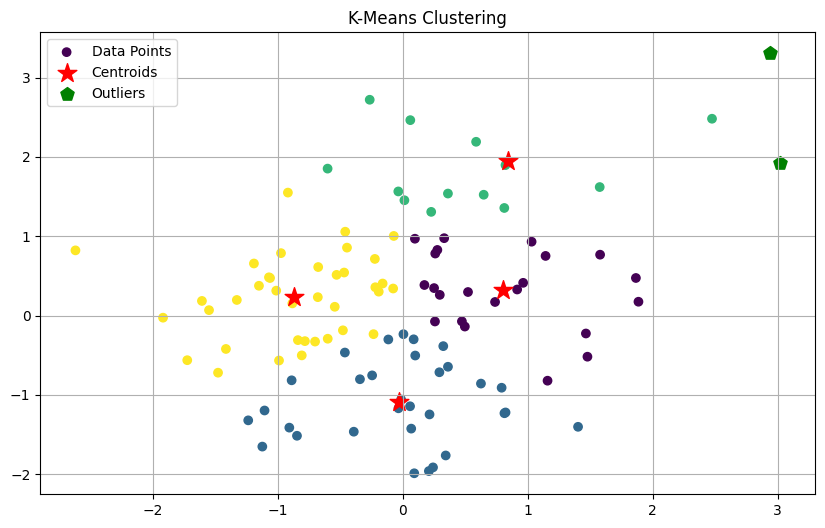

In [12]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.random.normal(loc=0, scale=1, size=(100, 2))
outliers = np.random.uniform(low=-4, high=4, size=(5, 2))
X = np.concatenate([X, outliers])

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

distances = kmeans.transform(X).min(axis=1)

threshold = 2
outliers_index = np.where(distances > threshold)[0]
print("Outliers detected at indices:", outliers_index)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.scatter(X[outliers_index, 0], X[outliers_index, 1], s=100, c='green', marker='p', label='Outliers')
plt.title('K-Means Clustering')
plt.legend()
plt.grid()
plt.show()


DB Scan

Outliers detected at indices: [ 37  41  53  56  62  78  83  89 104 117 118 126 131 150 151 152 153 154
 155 157 158 159]


<ipython-input-20-4c033c4418ee>:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[labels == label, 0], X[labels == label, 1], s=50, c=color, marker='o', label=f'Cluster {label}')


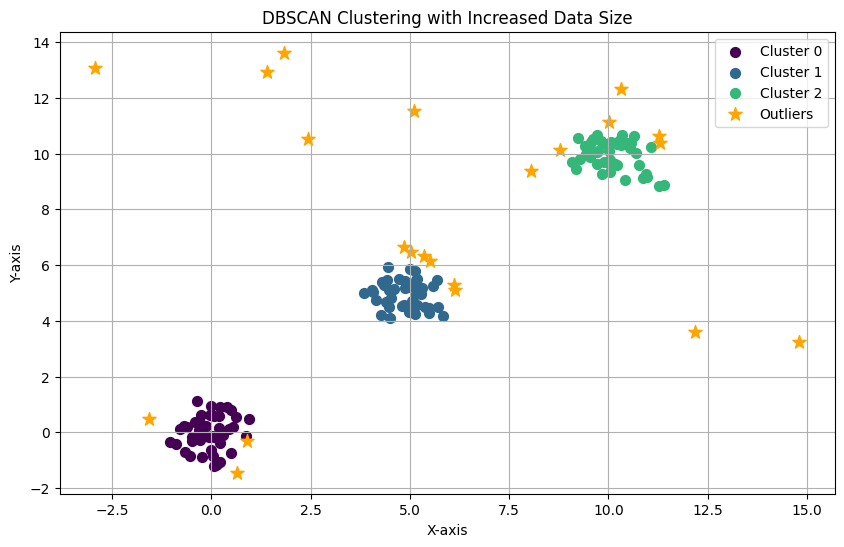

In [20]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.concatenate([
    np.random.normal(loc=0, scale=0.6, size=(50, 2)),
    np.random.normal(loc=5, scale=0.6, size=(50, 2)),
    np.random.normal(loc=10, scale=0.6, size=(50, 2)),
    np.random.uniform(low=-5, high=15, size=(10, 2))
])

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

outliers_index = np.where(labels == -1)[0]
print("Outliers detected at indices:", outliers_index)

plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        plt.scatter(X[outliers_index, 0], X[outliers_index, 1], s=100, c='orange', marker='*', label='Outliers')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], s=50, c=color, marker='o', label=f'Cluster {label}')

plt.title('DBSCAN Clustering with Increased Data Size')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()
